# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [586]:
# %pip install --upgrade plotly

### Import Statements

In [587]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [588]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [589]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [590]:
print(df_data.shape)
print(df_data.columns)
print(df_data.year.min())
df_data.year.max()

(962, 16)
Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')
1901


2020

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [591]:
for column in df_data.columns:
    print(column, df_data[column].duplicated().sum())

year 845
category 956
prize 360
motivation 367
prize_share 958
laureate_type 960
full_name 7
birth_date 44
birth_city 331
birth_country 837
birth_country_current 882
sex 959
organization_name 697
organization_city 774
organization_country 934
ISO 882


### Check for NaN Values

In [592]:
for column in df_data.columns:
    print(column, df_data[column].isna().sum())

year 0
category 0
prize 0
motivation 88
prize_share 0
laureate_type 0
full_name 0
birth_date 28
birth_city 31
birth_country 28
birth_country_current 28
sex 28
organization_name 255
organization_city 255
organization_country 254
ISO 28


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [593]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [594]:
df_data['share_pct'] = (1/ pd.to_numeric(df_data.prize_share.str.replace('1/', '')))
df_data.share_pct

0     1.00
1     1.00
2     1.00
3     0.50
4     0.50
      ... 
957   0.33
958   1.00
959   0.25
960   0.25
961   0.50
Name: share_pct, Length: 962, dtype: float64

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [595]:
biology = df_data.sex.value_counts()
fig = px.pie(labels=biology.index, 
             values=biology.values,
             title="Percentage of Male vs. Female Winners",
             names=biology.index,
             hole=0.4,)
 
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()
biology

c:\Users\andre\PycharmProjects\Data Science\Analysis with Plotly, Matplotlib and Seaborn\venv\Lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Male      876
Female     58
Name: sex, dtype: int64

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did they win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [596]:
df_data[df_data.sex == "Female"][:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [597]:
df_data[df_data.full_name.duplicated(keep=False)].sort_values('full_name')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR,0.25
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [598]:
categories = df_data.category.value_counts()
graph = px.bar(x=categories.index, 
               y=categories.values, 
               title="Number of Nobel Prizes by Category",
               labels={'x':'Category', 'y':'Number of Prizes'},
               color=categories.values,
               color_continuous_scale=px.colors.sequential.Aggrnyl)
graph.update_layout(coloraxis_showscale=False)


**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [599]:
df_data[df_data.category == "Economics"][:1]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [600]:
cat_men_women = df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dodgerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


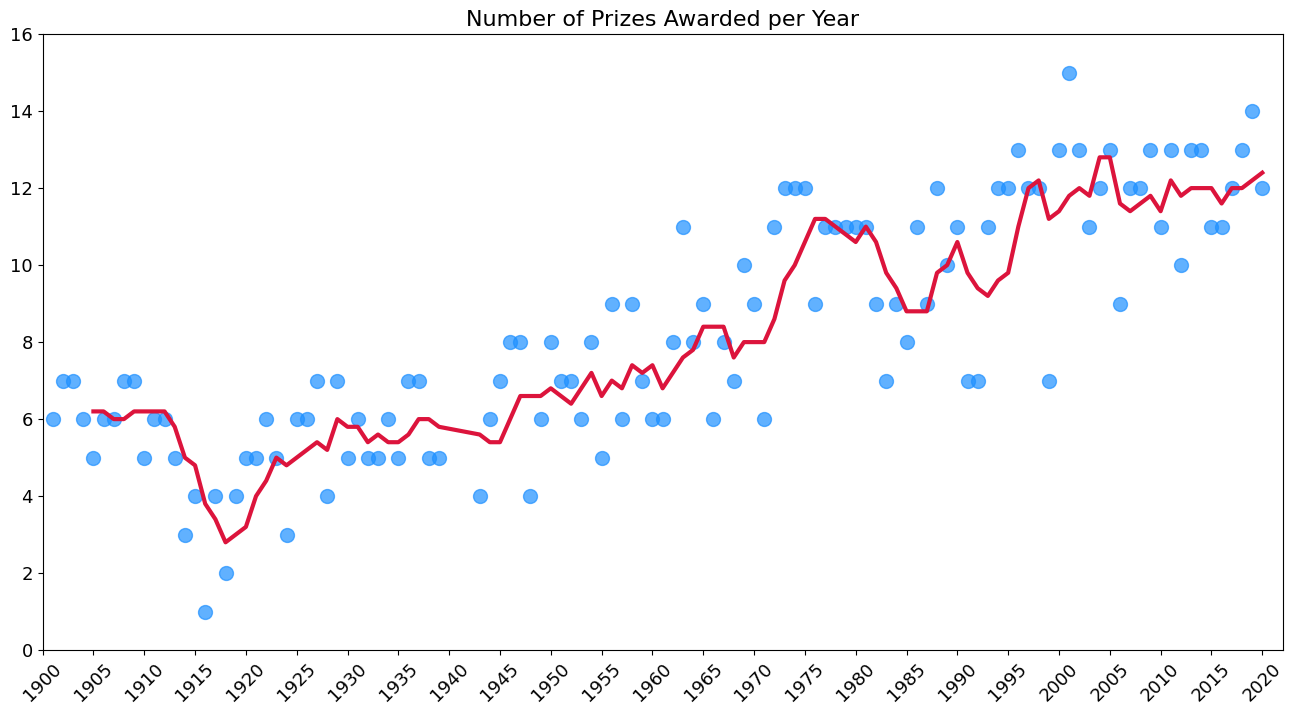

In [601]:
prize_per_year = df_data.groupby(by='year').count().prize 
moving_average = prize_per_year.rolling(window=5).mean()

plt.figure(figsize=(16, 8))
plt.scatter(x=prize_per_year.index,
            y=prize_per_year.values, 
            color='dodgerblue',
            label='Prizes per Year',
            alpha=0.7,
            s=100)
plt.plot(prize_per_year.index,
         moving_average.values,
         color='crimson',
         linewidth=3)
# show a tick mark on the x axis for every 5 years
plt.xticks(np.arange(1900, 2021, step=5), rotation=45, fontsize=13)
plt.yticks(np.arange(0, 18, step=2), fontsize=13)
plt.ylim(0)
plt.xlim(1900, 2022)
plt.title('Number of Prizes Awarded per Year', fontsize=16)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [602]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [603]:
# average prize share per year
avg_share = df_data.groupby(by='year').mean().share_pct
avg_share.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_10476\2683408973.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



year
1901   0.83
1902   0.71
1903   0.71
1904   0.83
1905   1.00
Name: share_pct, dtype: float64

In [604]:
moving_average_share = avg_share.rolling(window=5).mean()
moving_average_share.head()

year
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   0.82
Name: share_pct, dtype: float64

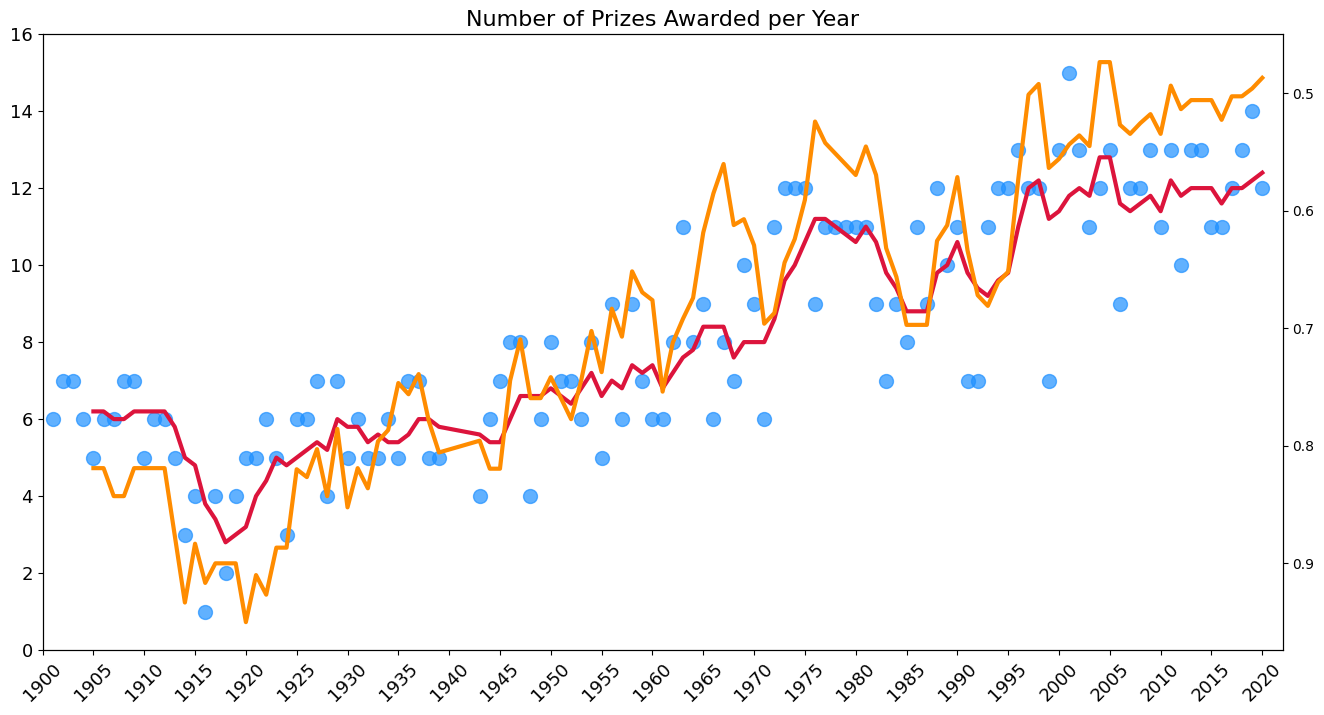

In [605]:
plt.figure(figsize=(16, 8))
plt.scatter(x=prize_per_year.index,
            y=prize_per_year.values, 
            color='dodgerblue',
            label='Prizes per Year',
            alpha=0.7,
            s=100)
plt.plot(prize_per_year.index,
         moving_average.values,
         color='crimson',
         linewidth=3)
# show a tick mark on the x axis for every 5 years
plt.xticks(np.arange(1900, 2021, step=5), rotation=45, fontsize=13)
plt.yticks(np.arange(0, 18, step=2), fontsize=13)
plt.ylim(0)
plt.xlim(1900, 2022)
plt.title('Number of Prizes Awarded per Year', fontsize=16)
# add a secondary axis
ax2 = plt.twinx()
# plot the average share per year
ax2.plot(avg_share.index,
         moving_average_share.values,
         color='darkorange',
         linewidth=3)

# invert the y axis
ax2.invert_yaxis() # or list method to reverse the values: ax2.set_ylim(ax2.get_ylim()[::-1])

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [606]:
top_20_countries = df_data[["birth_country", "prize"]]\
    .groupby(by="birth_country")\
        .count()\
            .sort_values(by="prize", 
                         ascending=False)
top_20_countries
# with "birth_country" we will have some 
# countries in the list which no longer exists

,prize
birth_country,
United States of America,281
United Kingdom,91
Germany,65
France,54
Sweden,29
...,...
Mecklenburg (Germany),1
Madagascar,1
Lithuania,1


In [607]:
top_20_countries = df_data[["organization_country", "prize"]]\
    .groupby(by="organization_country")\
        .count()\
            .sort_values(by="prize",
                         ascending=False)
top_20_countries[:20]

,prize
organization_country,
United States of America,368
United Kingdom,93
Germany,67
France,38
Switzerland,24
Japan,18
Sweden,17
Russia,12
Netherlands,11


In [608]:

top_20_countries = df_data[["birth_country_current", "prize"]]\
    .groupby(by="birth_country_current")\
        .count()\
            .sort_values(by="prize",
                         ascending=False)
top_20_countries.head(21)# this is the one to go for

,prize
birth_country_current,
United States of America,281
United Kingdom,105
Germany,84
France,57
Sweden,29
Japan,27
Poland,27
Russia,26
Canada,20


In [609]:
# create a horizontal bar chart
h_bar = px.bar(x=top_20_countries.prize[:20], 
               y=top_20_countries.index[:20],
               title='Top 20 Countries with the Most Nobel Prize Winners',
                orientation='h',
                color=top_20_countries.prize[:20],
                color_continuous_scale=px.colors.sequential.Aggrnyl)
h_bar.update_layout(coloraxis_showscale=False,
                    xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    width=1000,
                    height=600,
                    yaxis_categoryorder='total ascending')
h_bar.show() 
               

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [610]:
ISO = df_data[["birth_country_current", "ISO"]]\
    .groupby(by="ISO")\
        .count()\
            .sort_values(by="birth_country_current",
                          ascending=False)
print(ISO)
map = px.choropleth(ISO,
              locations=ISO.index,
              color=ISO.birth_country_current,
              hover_name=ISO.index,
              color_continuous_scale=px.colors.sequential.matter,
              title='Top 20 Countries with the Most Nobel Prize Winners',
              width=900,
              height=600)
# change color axis name
map.update_layout(coloraxis_colorbar=dict(title='Number of Prizes'))

     birth_country_current
ISO                       
USA                    281
GBR                    105
DEU                     84
FRA                     57
SWE                     29
..                     ...
LVA                      1
MAR                      1
MDG                      1
MKD                      1
ZWE                      1

[79 rows x 1 columns]


# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [611]:
# create a dataframe with the number of prizes per country and the category of each one
prizes_per_country = df_data[["birth_country_current", "category", "prize"]]\
    .groupby(by=["birth_country_current", "category"])\
        .count()\
            .sort_values(by='birth_country_current',
                            ascending=False)
prizes_per_country['total_prizes'] = prizes_per_country.groupby(level=0).transform(sum)
prizes_per_country = prizes_per_country.reset_index()
prizes_per_country.sort_values(by='total_prizes', inplace=True)
prizes_per_country = prizes_per_country[-110:].reset_index(drop=True)
# invert only the index
prizes_per_country.index = prizes_per_country.index[::-1]

prizes_per_country = prizes_per_country[prizes_per_country.birth_country_current != 'South Africa'] # because it was shown on top of the chart


In [612]:
px.bar(prizes_per_country,
       x='prize',
       y='birth_country_current',
       color='category',
       orientation='h',
       title='Number of Prizes per Country and Category',
       width=900,
       height=1000)

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [613]:
prizes_by_year = df_data[["year", "prize", "birth_country_current"]]\
    .groupby(by=["year", "birth_country_current"])\
        .count()\
            .sort_values(by='year',
                            ascending=False)
prizes_by_year = prizes_by_year.reset_index()
prizes_by_year

,year,birth_country_current,prize
0,2020,United States of America,7
1,2020,United Kingdom,2
2,2020,Germany,1
3,2020,France,1
4,2019,Germany,1
...,...,...,...
622,1901,Poland,1
623,1901,Netherlands,1
624,1901,Germany,1
625,1901,Switzerland,1


In [614]:
# create  a plotly line chart where each country is a coloured line
line_chart = px.line(prizes_by_year,
                     x='year',
                     y='prize',
                     color='birth_country_current',
                     title='Number of Prizes per Year and Country',
                     width=2000,
                     height=600)
line_chart.update_layout(coloraxis_showscale=False,
                        xaxis_title='Year',
                        yaxis_title='Number of Prizes',
                        yaxis_tickmode='linear',
                        yaxis_tick0=0,
                        yaxis_dtick=1,
                        yaxis_range=[1, 8],
                        xaxis_tickmode='linear',
                        xaxis_tick0=1900,
                        xaxis_dtick=5,
                        xaxis_range=[1900, 2021])
line_chart.show()

In [615]:
# plot another one but this time with the cumulative number over time
cumulative_prizes = prizes_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [616]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [617]:
top_20_institutions = df_data[["organization_name", "prize"]]\
    .groupby(by="organization_name")\
        .count()\
            .sort_values(by="prize", 
                            ascending=False)[:20]
top_20_institutions

,prize
organization_name,
University of California,40
Harvard University,29
Stanford University,23
Massachusetts Institute of Technology (MIT),21
University of Chicago,20
University of Cambridge,18
California Institute of Technology (Caltech),17
Columbia University,17
Princeton University,15


In [618]:
graph = px.bar(top_20_institutions,
       x='prize',
       y=top_20_institutions.index,
       orientation='h',
       title='Top 20 Institutions with the Most Nobel Prize Winners',
       color=top_20_institutions.prize,
       color_continuous_scale=px.colors.sequential.haline)
graph.update_layout(coloraxis_showscale=False,
                    xaxis_title='Number of Prizes',
                    yaxis_title='Institution',
                    width=900,
                    height=600,
                    yaxis_categoryorder='total ascending')
graph.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [619]:
top_20_cities = df_data[["organization_city", "prize"]]\
    .groupby(by="organization_city")\
        .count()\
            .sort_values(by="prize", 
                            ascending=False)[:20]
top_20_cities

,prize
organization_city,
"Cambridge, MA",50
"New York, NY",45
Cambridge,31
London,27
Paris,25
"Stanford, CA",24
"Berkeley, CA",21
"Chicago, IL",20
"Princeton, NJ",19


In [620]:
graph = px.bar(top_20_cities,
       x='prize',
       y=top_20_cities.index,
       orientation='h',
       title="Top 20 Institution's Cities with the Most Nobel Prize Winners",
       color=top_20_cities.prize,
       color_continuous_scale=px.colors.sequential.Jet_r)
graph.update_layout(coloraxis_showscale=False,
                    xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    width=900,
                    height=600,
                    yaxis_categoryorder='total ascending')
graph.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [621]:
top_20_laureates_cities = df_data[["birth_city", "prize"]]\
    .groupby(by="birth_city")\
        .count()\
            .sort_values(by="prize", 
                            ascending=False)[:20]
top_20_laureates_cities

,prize
birth_city,
"New York, NY",53
Paris,26
London,19
Vienna,14
"Chicago, IL",12
Berlin,11
"Washington, DC",8
"Brooklyn, NY",8
Budapest,8


In [622]:
graph = px.bar(top_20_laureates_cities,
       x='prize',
       y=top_20_laureates_cities.index,
       orientation='h',
       title="Top 20 Laureates' Cities with the Most Nobel Prize Winners",
       color=top_20_laureates_cities.prize,
       color_continuous_scale=px.colors.sequential.Plasma)
graph.update_layout(coloraxis_showscale=False,
                    xaxis_title='Number of Prizes',
                    yaxis_title='Laureate Birth City',
                    width=900,
                    height=600,
                    yaxis_categoryorder='total ascending')
graph.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [623]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'],
                                   as_index=False)\
                                       .agg({'prize': pd.Series.count})
 
country_city_org = country_city_org\
    .sort_values('prize',
                 ascending=False)

In [826]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False,
                    width=900,
                    height=900)
 
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [625]:
# use pd.Series.dt.year to get the year of the date
df_data['winning_age'] = df_data['year'] - df_data['birth_date'].dt.year
df_data['winning_age']

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Name: winning_age, Length: 962, dtype: float64

In [626]:
df_data['winning_age'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [631]:
oldest = df_data.sort_values(by='winning_age', ascending=False)[:5]
newest = df_data.sort_values(by='winning_age', ascending=True)[:5]

In [649]:
oldest['full_name'], newest['full_name']

(937     John Goodenough
 933       Arthur Ashkin
 794      Leonid Hurwicz
 961       Roger Penrose
 856    Lloyd S. Shapley
 Name: full_name, dtype: object,
 885             Malala Yousafzai
 85        William Lawrence Bragg
 932                  Nadia Murad
 305         Tsung-Dao (T.D.) Lee
 171    Paul Adrien Maurice Dirac
 Name: full_name, dtype: object)

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [650]:
# calculate the descriptive statistics for the winning age
df_data['winning_age'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

<AxesSubplot: xlabel='winning_age', ylabel='Count'>

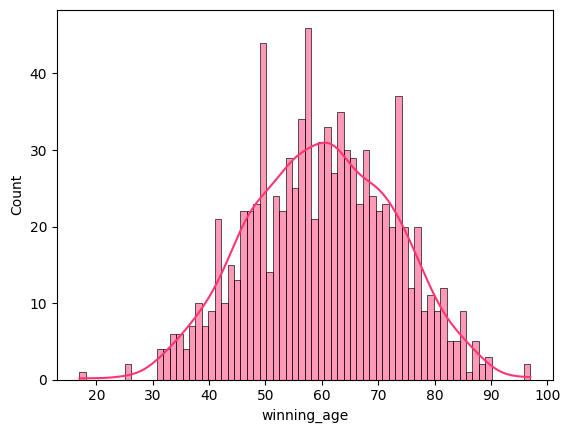

In [669]:
sns.histplot(data=df_data,
             x='winning_age',
             bins=70,
             kde=True,
             color='#FF3573')

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


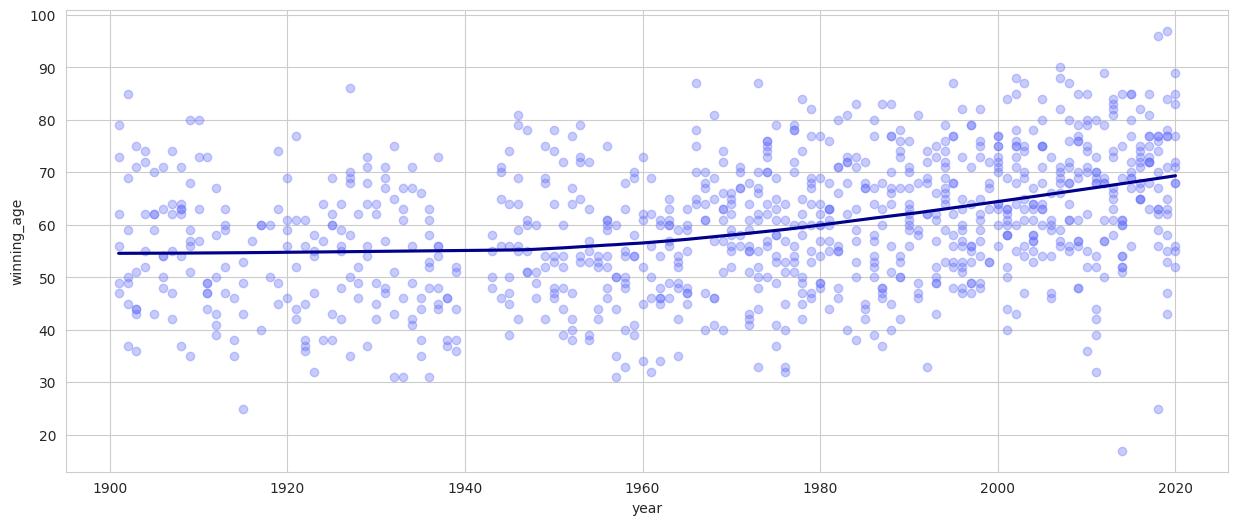

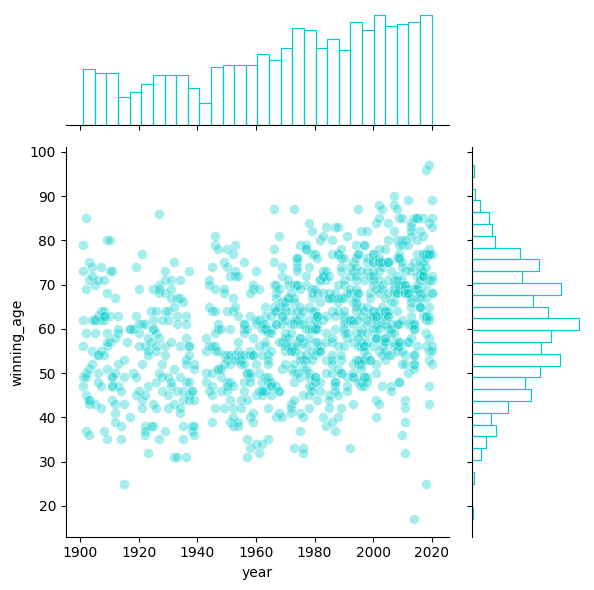

In [729]:
plt.figure(figsize=(15, 6))
with sns.axes_style('whitegrid'):
        sns.regplot(data=df_data,
                    x='year',
                    y='winning_age',
                    lowess=True,
                    color=px.colors.qualitative.Plotly[0],
                    scatter_kws = {'alpha': 0.35},
                    line_kws={'color': 'darkblue'})
sns.jointplot(data=df_data,
                x='year',
                y='winning_age',
                kind='scatter',
                color='#00CCCC',
                alpha=0.35,
                height=6,
                ratio=3,
                marginal_kws=dict(bins=30, fill=False),
                joint_kws=dict(s=50, alpha=0.35))
        
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

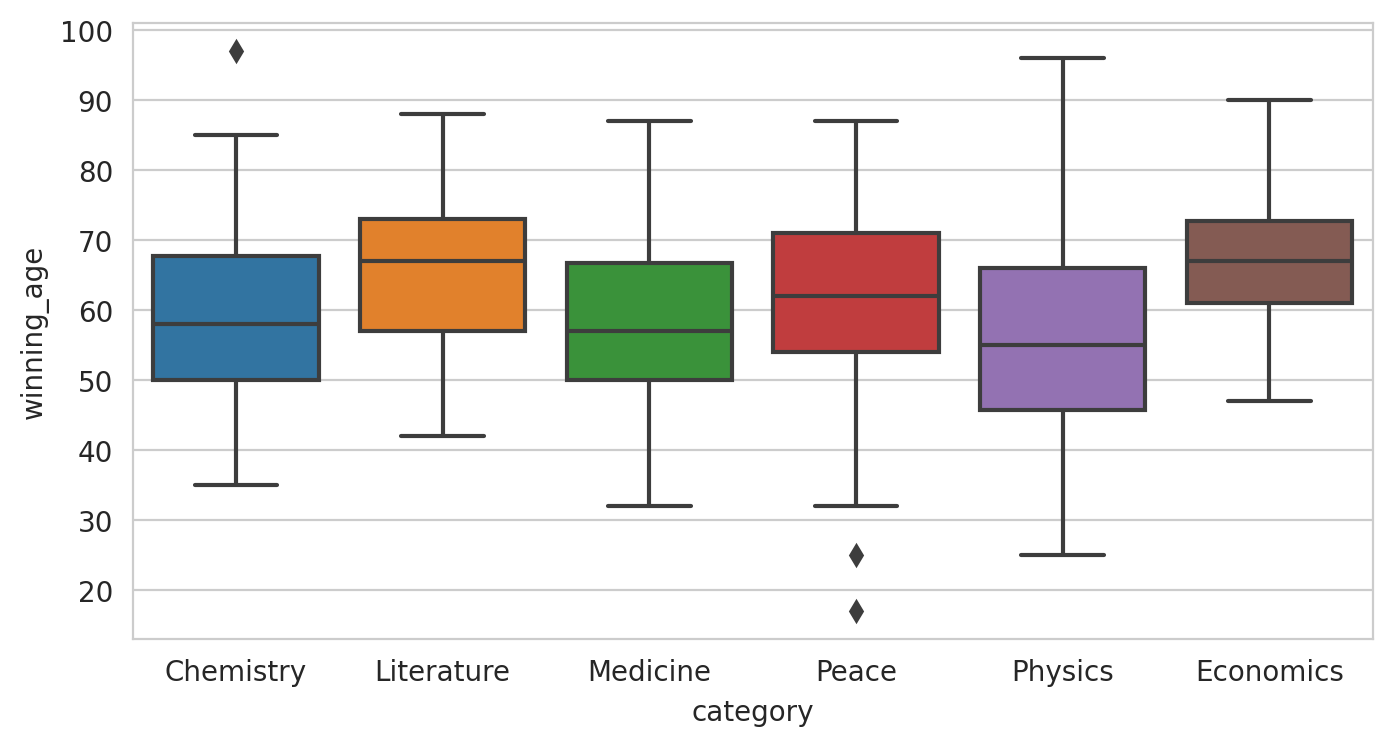

In [740]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


<Figure size 1280x960 with 0 Axes>

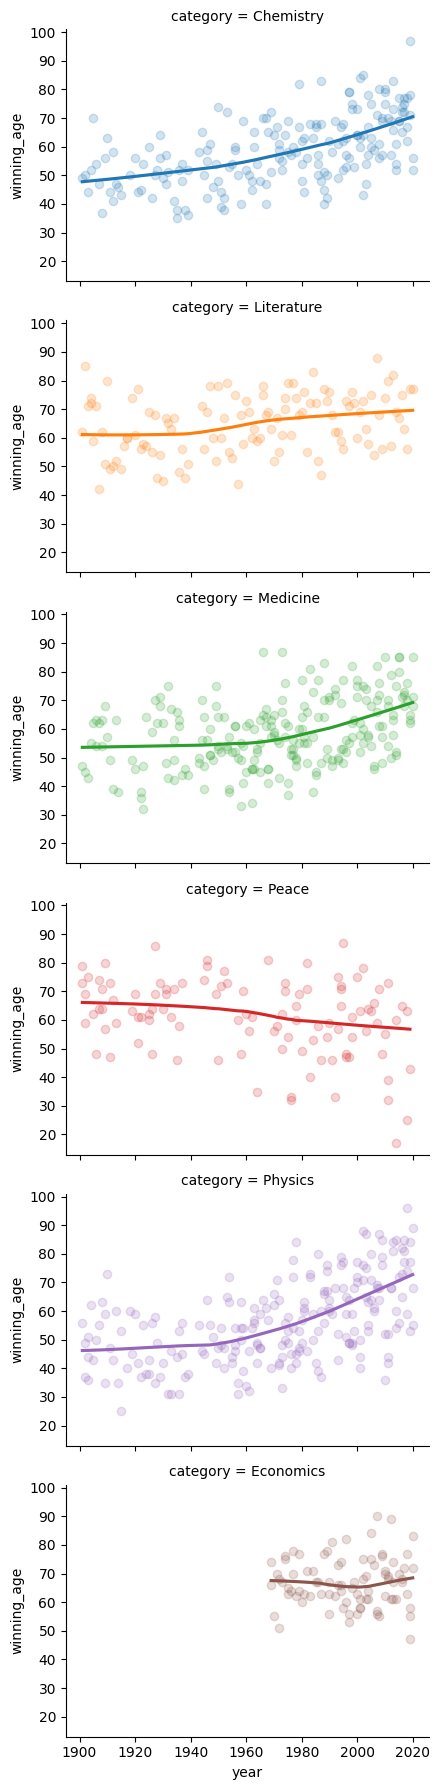

In [820]:
plt.figure(dpi=200)
sns.lmplot( data=df_data,
            x='year',
            row='category',
            y='winning_age',
            hue='category',
            height=3,
            aspect=1.5,
            scatter_kws={'alpha': 0.2},
            lowess=True)
plt.show()

<Figure size 1280x960 with 0 Axes>

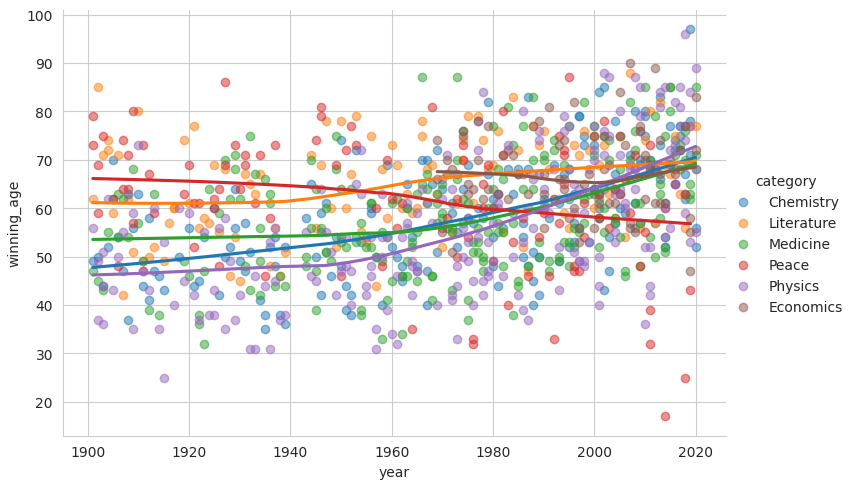

In [821]:
plt.figure(dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot( data=df_data,
                x='year',
                y='winning_age',
                hue='category',
                aspect=1.5,
                scatter_kws={'alpha': 0.5},
                lowess=True)
plt.show()